In [7]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1. Definir parâmetros
# =========================
context_length = 168  # históricos para o modelo
horizon = 64          # passos a prever
N = context_length + horizon  # total da série

model_path = "moe_model.pt"
device = "cpu"

# =========================
# 2. Criar série sintética 
# =========================
t = np.arange(N)
series = np.sin(2 * np.pi * t / 50) + 0.1 * np.random.randn(N)

In [9]:
# =========================
# 2. Predizer
# =========================
from setup.models.modeling_model import predict_from_model

preds = predict_from_model(model_path=model_path, series=series[:-horizon], horizon=horizon, context_length=context_length, device=device)
print(preds)

Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]


Sample 0: Selected -> TimesFM: 0.580, Moirai-MoE: 0.420; Not selected -> Moirai: 0.115, Time-MoE: 0.183, Timer: 0.160, Chronos: 0.107
tensor([[ 0.5532,  0.5891,  0.5495,  0.5959,  0.3641,  0.2761,  0.0133,  0.0035,
          0.1170,  0.2369,  0.0975, -0.0338, -0.2595, -0.5065, -0.4857, -0.3593,
         -0.3540, -0.4549, -0.3373, -0.3013, -0.3803, -0.3964, -0.5242, -0.4056,
         -0.2000, -0.1556, -0.1009,  0.0652, -0.1691, -0.1125, -0.2191, -0.0971,
          0.1400,  0.3520,  0.2306,  0.3953,  0.4238,  0.4626,  0.4794,  0.3966,
          0.6291,  0.7679,  0.7859,  0.9371,  0.7328,  0.7379,  0.6124,  0.6770,
          0.5590,  0.6395,  0.5483,  0.5519,  0.5009,  0.4686,  0.1959,  0.2047,
          0.2326,  0.3318,  0.1860,  0.1754, -0.0578, -0.1233, -0.0970, -0.2070]])


In [10]:
# =========================
# 3. Converter saída em array
# =========================
pred_list = preds.squeeze(0).tolist()
pred_array = np.array(pred_list)

In [11]:
pred_array

array([ 0.55316448,  0.5890891 ,  0.54951221,  0.59590292,  0.3641355 ,
        0.27611828,  0.01331903,  0.00346637,  0.11698984,  0.23690863,
        0.09747908, -0.03381078, -0.25948095, -0.50649577, -0.48567188,
       -0.35934037, -0.35401738, -0.45487088, -0.33728677, -0.30125687,
       -0.38034913, -0.39638561, -0.52418643, -0.40564561, -0.20003161,
       -0.15556043, -0.10085604,  0.06517264, -0.16906479, -0.11253437,
       -0.21910937, -0.09706901,  0.13996617,  0.35198787,  0.23063859,
        0.39527649,  0.42375758,  0.46256652,  0.47936675,  0.39658341,
        0.62905657,  0.76794004,  0.78585076,  0.93707651,  0.7327593 ,
        0.73792088,  0.61241239,  0.67696673,  0.55895168,  0.63945538,
        0.54828244,  0.55190355,  0.50091857,  0.46861279,  0.19593912,
        0.20468846,  0.23256266,  0.33179703,  0.18597411,  0.17542551,
       -0.05784349, -0.12328844, -0.09696203, -0.20696263])

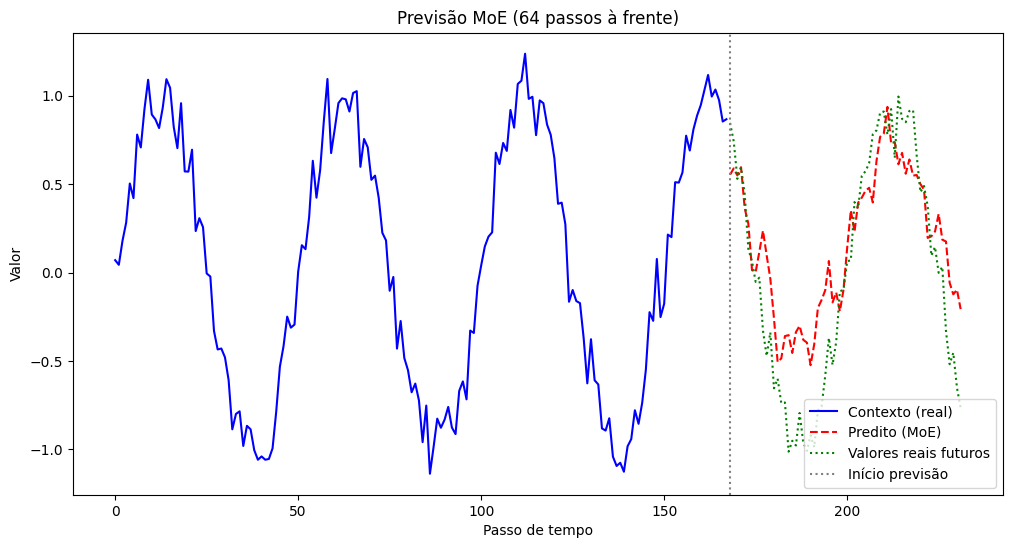

In [12]:
# =========================
# 4. Plotar
# =========================
context = series[:context_length]
future_real = series[context_length:] 

time_axis_context = range(context_length)
time_axis_pred = range(context_length, context_length + horizon)
time_axis_real = range(context_length, context_length + horizon)

plt.figure(figsize=(12,6))
plt.plot(time_axis_context, context, label="Contexto (real)", color="blue")
plt.plot(time_axis_pred, pred_array, label="Predito (MoE)", color="red", linestyle="--")
plt.plot(time_axis_real, future_real, label="Valores reais futuros", color="green", linestyle=":")

plt.axvline(context_length, color="gray", linestyle=":", label="Início previsão")
plt.legend()
plt.xlabel("Passo de tempo")
plt.ylabel("Valor")
plt.title(f"Previsão MoE ({horizon} passos à frente)")
plt.show()